In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired) # 色設定

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [4]:
data.target_names

array(['malignant', 'benign'],
      dtype='<U9')

In [5]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [8]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [11]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')

In [12]:
clf.C = 1
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95614035087719296

In [13]:
clf.C = 1000
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.98245614035087714

In [14]:
import time

In [15]:
C_range_exp = np.arange(-20.,20.)
C_range = 10 ** C_range_exp

scores = []
comp_time = []

for C in C_range:
    clf.C = C

    st = time.time()
    clf.fit(X_train, y_train)
    comp_time.append(time.time() - st)

    score = clf.score(X_test, y_test)
    print(C, score)
    scores.append(score)

scores = np.array(scores)
comp_time = np.array(comp_time)

1e-20 0.587719298246
1e-19 0.587719298246
1e-18 0.587719298246
1e-17 0.587719298246
1e-16 0.587719298246
1e-15 0.587719298246
1e-14 0.587719298246
1e-13 0.587719298246
1e-12 0.587719298246
1e-11 0.587719298246
1e-10 0.587719298246
1e-09 0.587719298246
1e-08 0.587719298246
1e-07 0.587719298246
1e-06 0.587719298246
1e-05 0.587719298246
0.0001 0.587719298246
0.001 0.587719298246
0.01 0.587719298246
0.1 0.684210526316
1.0 0.956140350877
10.0 0.964912280702
100.0 0.964912280702
1000.0 0.982456140351
10000.0 0.982456140351
100000.0 0.982456140351
1000000.0 0.982456140351
10000000.0 0.982456140351
100000000.0 0.982456140351
1000000000.0 0.982456140351
10000000000.0 0.982456140351
100000000000.0 0.982456140351
1e+12 0.982456140351
1e+13 0.982456140351
1e+14 0.982456140351
1e+15 0.982456140351
1e+16 0.982456140351
1e+17 0.982456140351
1e+18 0.982456140351
1e+19 0.982456140351


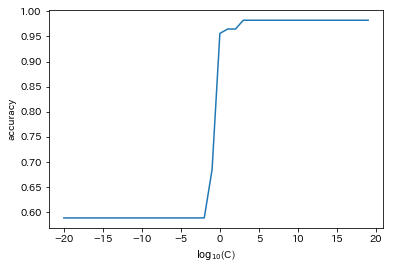

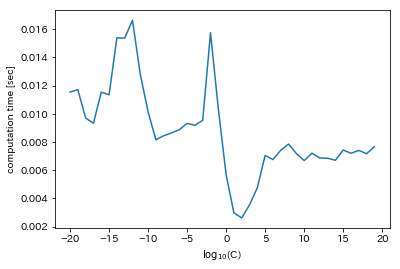

In [16]:
plt.plot(C_range_exp, scores)
plt.ylabel("accuracy")
plt.xlabel(r"$\log_{10}$(C)");
plt.show()

plt.plot(C_range_exp, comp_time)
plt.ylabel("computation time [sec]")
plt.xlabel(r"$\log_{10}$(C)");

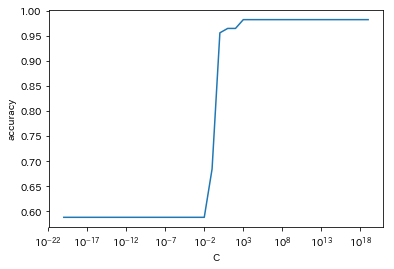

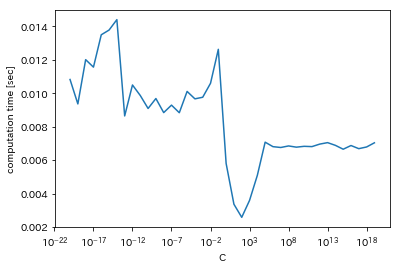

In [15]:
# 上のコードを対数グラフを用いて行なってみる．

plt.plot(C_range, scores)
plt.ylabel("accuracy")
plt.xlabel("C");
plt.xscale('log')
plt.show()

plt.plot(C_range, comp_time)
plt.ylabel("computation time [sec]")
plt.xscale('log')
plt.xlabel("C");

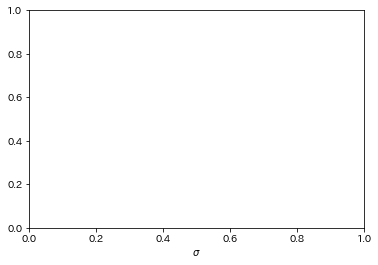

In [17]:
plt.xlabel(r"$\sigma$") # ラベルなどに数式を使いたい時はraw文字列でTex方式にするとかける．

[matplotlibでの LaTeX 表記の実現](https://showa-yojyo.github.io/notebook/python-matplotlib/advanced.html#latex)

In [19]:
# ロジスティック回帰でも同じようなことをしてみる．
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [20]:
clf.C = 1
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95614035087719296

In [21]:
clf.C = 100
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.97368421052631582

In [22]:
C_range_exp = np.arange(-20., 15.)
C_range = 10 ** C_range_exp

scores = []
comp_time = []

for C in C_range:
    clf.set_params(C=C)

    st = time.time()
    clf.fit(X_train, y_train)
    comp_time.append(time.time() - st)

    score = clf.score(X_test, y_test)
    print(C, score)
    scores.append(score)

scores = np.array(scores)
comp_time = np.array(comp_time)

1e-20 0.412280701754
1e-19 0.412280701754
1e-18 0.412280701754
1e-17 0.412280701754
1e-16 0.412280701754
1e-15 0.587719298246
1e-14 0.587719298246
1e-13 0.587719298246
1e-12 0.587719298246
1e-11 0.587719298246
1e-10 0.587719298246
1e-09 0.587719298246
1e-08 0.587719298246
1e-07 0.587719298246
1e-06 0.587719298246
1e-05 0.587719298246
0.0001 0.587719298246
0.001 0.59649122807
0.01 0.850877192982
0.1 0.921052631579
1.0 0.956140350877
10.0 0.964912280702
100.0 0.973684210526
1000.0 0.947368421053
10000.0 0.947368421053
100000.0 0.947368421053
1000000.0 0.947368421053
10000000.0 0.956140350877
100000000.0 0.956140350877
1000000000.0 0.956140350877
10000000000.0 0.956140350877
100000000000.0 0.956140350877
1e+12 0.956140350877
1e+13 0.956140350877
1e+14 0.956140350877


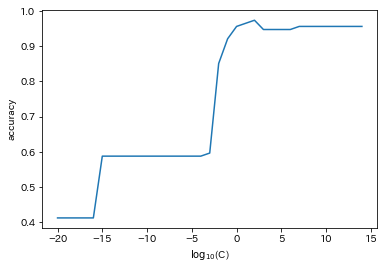

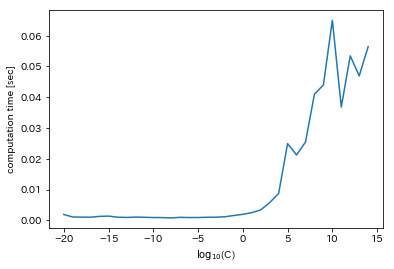

In [23]:
plt.plot(C_range_exp, scores)
plt.ylabel("accuracy")
plt.xlabel(r"$\log_{10}$(C)");
plt.show()

plt.plot(C_range_exp, comp_time)
plt.ylabel("computation time [sec]")
plt.xlabel(r"$\log_{10}$(C)");

In [24]:
# クロスエントロピーを使ってみる．
clf = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=20000) # solverを勉強すべき．

C_range_exp = np.arange(-20., 15.)
C_range = 10 ** C_range_exp

scores = []
comp_time = []

for C in C_range:
    clf.set_params(C=C)

    st = time.time()
    clf.fit(X_train, y_train)
    comp_time.append(time.time() - st)

    score = clf.score(X_test, y_test)
    print(C, score)
    scores.append(score)

scores = np.array(scores)
comp_time = np.array(comp_time)

1e-20 0.587719298246
1e-19 0.587719298246
1e-18 0.587719298246
1e-17 0.587719298246
1e-16 0.587719298246
1e-15 0.587719298246
1e-14 0.587719298246
1e-13 0.587719298246
1e-12 0.587719298246
1e-11 0.587719298246
1e-10 0.587719298246
1e-09 0.587719298246
1e-08 0.587719298246
1e-07 0.587719298246
1e-06 0.587719298246
1e-05 0.587719298246
0.0001 0.587719298246
0.001 0.587719298246
0.01 0.824561403509
0.1 0.956140350877
1.0 0.973684210526
10.0 0.964912280702
100.0 0.973684210526
1000.0 0.956140350877
10000.0 0.947368421053
100000.0 0.947368421053
1000000.0 0.947368421053
10000000.0 0.947368421053
100000000.0 0.947368421053
1000000000.0 0.947368421053
10000000000.0 0.947368421053
100000000000.0 0.947368421053
1e+12 0.947368421053
1e+13 0.947368421053
1e+14 0.947368421053


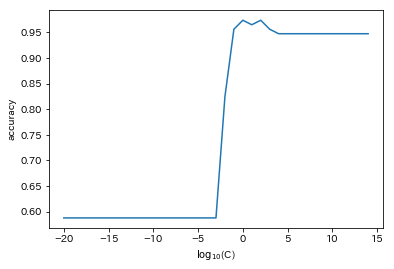

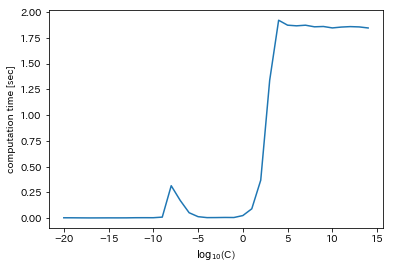

In [25]:
plt.plot(C_range_exp, scores)
plt.ylabel("accuracy")
plt.xlabel(r"$\log_{10}$(C)");
plt.show()

plt.plot(C_range_exp, comp_time)
plt.ylabel("computation time [sec]")
plt.xlabel(r"$\log_{10}$(C)");

以下は全て２クラス問題に対しての損失関数．

scikit-learn document: [Logistic regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

$$
\min_{\boldsymbol{w},b}
\frac{1}{2} \| w \|_2^2
+ C \sum_{i=1}^N
\log(\exp(-y_i(\boldsymbol{w}^T \boldsymbol{x}_i + b)) + 1)
$$

scikit-learn document: [SVC](http://scikit-learn.org/stable/modules/svm.html#svc)

$$
\min_{\boldsymbol{w}, b, \{\xi_i\} }
\frac{1}{2} \| w \|_2^2
+ C \sum_{i=1}^N \xi_i
\quad \text{subject to}\quad 
y_i(\boldsymbol{w}^T \boldsymbol{x}_i + b) \ge 1 - \xi_i
$$


scikit-learn document: [Kernel functions](http://scikit-learn.org/stable/modules/svm.html#svm-kernels)

$$
\min_{\boldsymbol{w}, b, \{\xi_i\} }
\frac{1}{2} \| w \|_2^2
+ C \sum_{i=1}^N \xi_i
\quad \text{subject to}\quad 
y_i(\boldsymbol{w}^T \phi(\boldsymbol{x}_i) + b) \ge 1 - \xi_i
$$

$$
\text{rbf: }\quad
K(\boldsymbol{x}, \boldsymbol{x}')=
\phi(\boldsymbol{x})^T \phi(\boldsymbol{x'})=
\exp(-\gamma \| \boldsymbol{x}-\boldsymbol{x'} \|^2)
$$

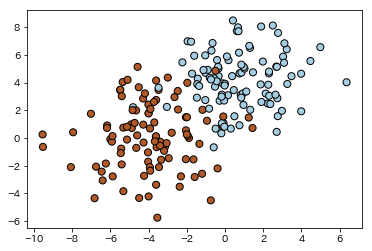

In [26]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット

In [27]:

def plotSVMBoundary(X, clf, mesh=True, boundary=True):
    
    # if SVM, draw margine lines
    colors = ['k']*3
    linestyles = ['-']*3
    levels = [-1, 0, 1]
    # if SVM, plot support vecters
    plt.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1],
                s=80, facecolors='none', edgecolors='k')
    
    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, zorder=-10)
    if boundary:
        plt.contour(XX, YY, Z, 
                    colors=colors,
                    linestyles=linestyles,
                    levels=levels) # draw lines (level=0:boundary, level=+-1:margine lines)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

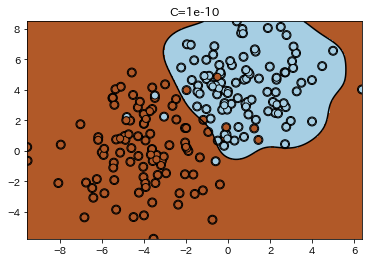

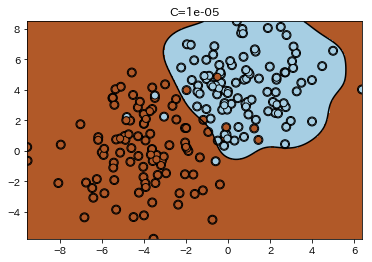

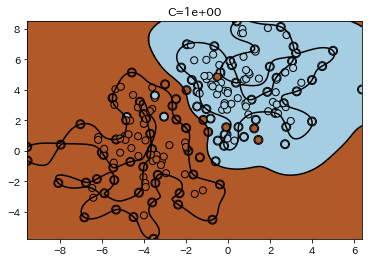

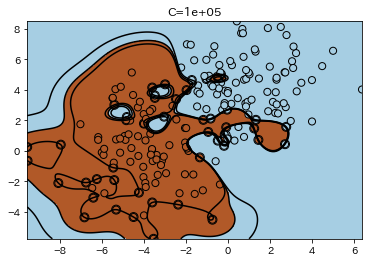

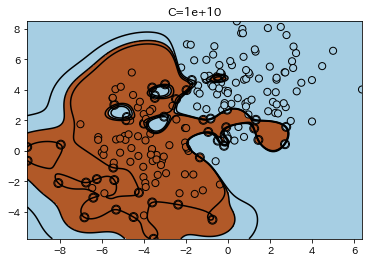

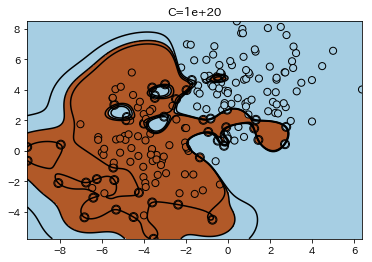

In [28]:
from sklearn.svm import SVC

clf = SVC()
clf.kernel = 'rbf'
    
for C in [1e-10, 1e-5, 1, 1e5, 1e10, 1e20]:
   
    clf.C = C
    clf.fit(X,y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plt.title("C={0:.0e}".format(C))
    
    plt.show()

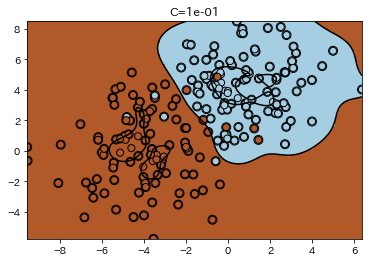

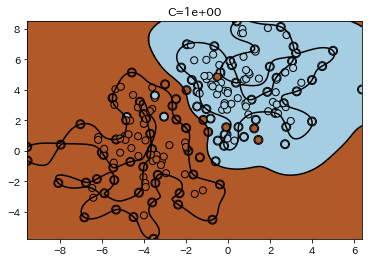

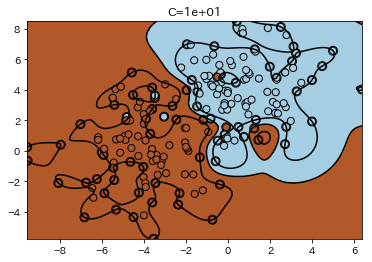

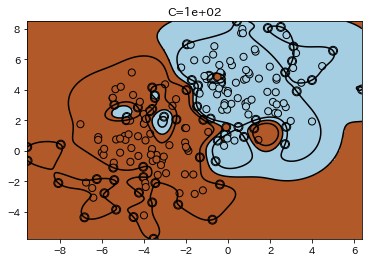

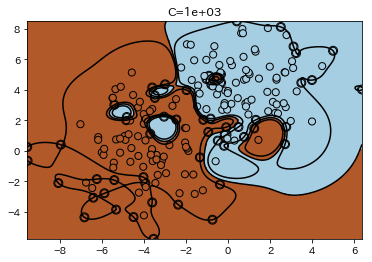

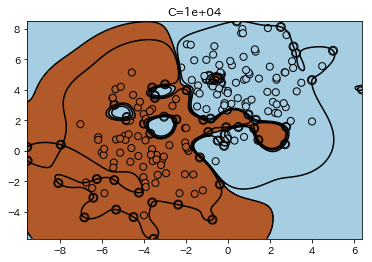

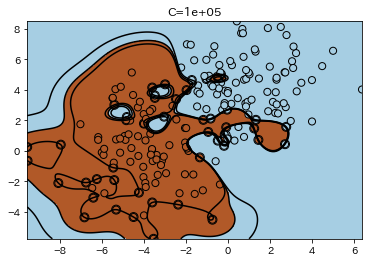

In [29]:
# Cを１０^-1 ~ 10^5　までの範囲で変えてみる．
from sklearn.svm import SVC

clf = SVC()
clf.kernel = 'rbf'
    
for C in 10 ** np.arange(-1.0, 6.0):
   
    clf.C = C
    clf.fit(X,y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plt.title("C={0:.0e}".format(C))
    
    plt.show()

(-10, 10)

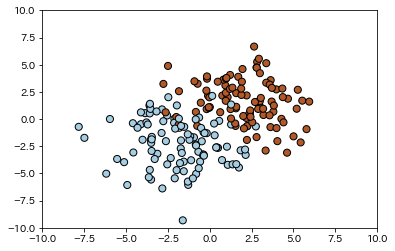

In [30]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, # 200個生成
                  n_features=2, # 2次元
                  centers=[(-2, -2), (2, 2)],    # クラスタ中心2個
                  cluster_std=2, # クラスタの大きさ（標準偏差）
                  # random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k'); # 2次元散布図でプロット
plt.xlim(-10,10)
plt.ylim(-10,10)

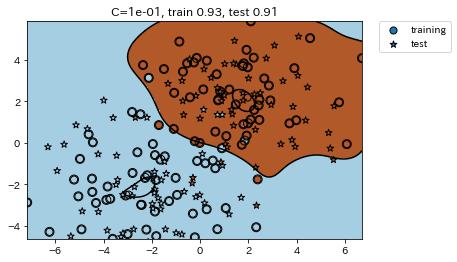

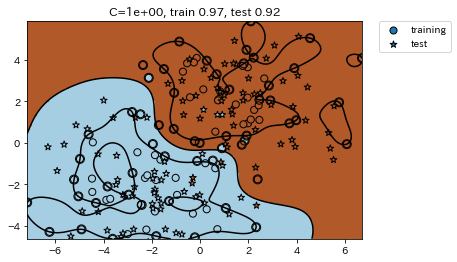

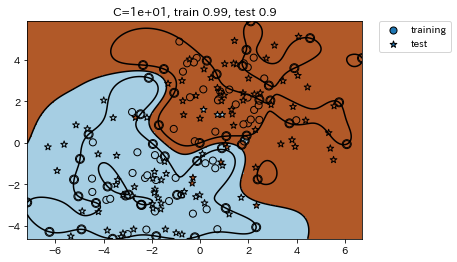

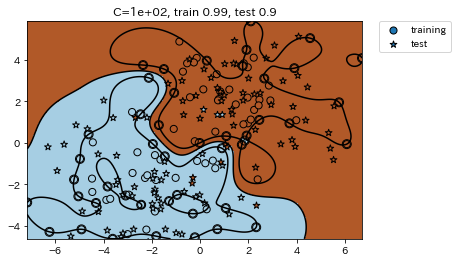

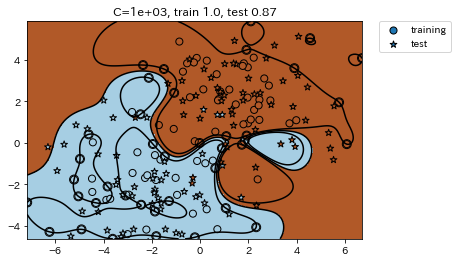

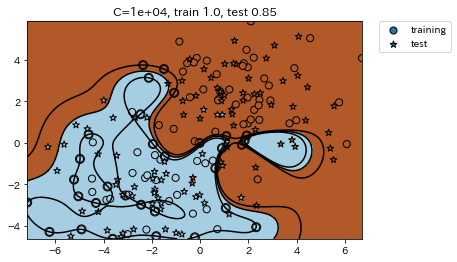

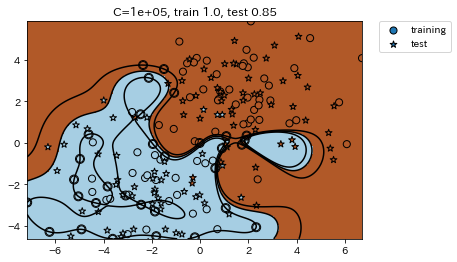

In [31]:
from sklearn.svm import SVC

clf = SVC()
clf.kernel = 'rbf'

X_train, y_train = make_blobs(n_samples=100, # 100個生成
              n_features=2, # 2次元
              centers=[(-2, -2), (2, 2)],    # クラスタ中心2個
              cluster_std=2, # クラスタの大きさ（標準偏差）
              # random_state=3   # 乱数種（再現用）
             )

X_test, y_test = make_blobs(n_samples=100, # 100個生成
      n_features=2, # 2次元
      centers=[(-2, -2), (2, 2)],    # クラスタ中心2個
      cluster_std=2, # クラスタの大きさ（標準偏差）
      # random_state=3   # 乱数種（再現用）
     )


for C in 10 ** np.arange(-1.0, 6.0):
   
    clf.C = C
    
    plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', s=50, c=y_train, label="training", edgecolors='k')

    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)

    plotSVMBoundary(X_train, clf, mesh=True)
    
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='*', s=50, c=y_test, label="test", edgecolors='k')

    test_score = clf.score(X_test, y_test)
    
    plt.title("C={0:.0e}, train {1}, test {2}".format(C, train_score, test_score))

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()

C が大きくなりすぎると過学習を起こすことになる